## K-Mode Clustering

### Importing all required packages

In [138]:
# Importing all required packages
import numpy as np
import pandas as pd

# Import module for data visualization
from plotnine import *
import plotnine

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

### Data Reading and Understading

In [139]:
df = pd.read_csv('data.csv')

In [140]:
df.head()

,Timestamp,Name,Gender,Location,Preferred product type,Preferred brand,Times of shop in a month,Maximum amount spend on single order,Maximum amount expend on each month,Acceptable number of delivery days,Type of offer you like most
0,5/2/2022 16:57:25,Vikas,Male,Bihar,Fashion,Others,2 -5,500 - 1500,1000 - 5000,2 - 3 Days,Discount On Price
1,5/2/2022 16:57:42,Sagnik Bhattacharya,Male,West Bengal,Electronics,Sony,2 -5,Less than 500,1000 - 5000,2 - 3 Days,Discount On Price
2,5/2/2022 17:04:09,Raj,Male,Jharkhand,Electronics,Samsung,1 or Less than 1,More than 5000,More than 10000,2 - 3 Days,Product Purchase on Installement
3,5/2/2022 17:05:04,Madhusudhan,Male,Andhra Pradesh,Electronics,Sony,1 or Less than 1,500 - 1500,1000 - 5000,2 - 3 Days,Discount On Price
4,5/2/2022 17:06:43,Rahul Pathak,Male,Bihar,Electronics,Samsung,2 -5,500 - 1500,1000 - 5000,3 - 5 Days,Discount On Price


### Data Preprocessing

In [141]:
df=df.drop(['Timestamp'], axis=1)

In [142]:
df

,Name,Gender,Location,Preferred product type,Preferred brand,Times of shop in a month,Maximum amount spend on single order,Maximum amount expend on each month,Acceptable number of delivery days,Type of offer you like most
0,Vikas,Male,Bihar,Fashion,Others,2 -5,500 - 1500,1000 - 5000,2 - 3 Days,Discount On Price
1,Sagnik Bhattacharya,Male,West Bengal,Electronics,Sony,2 -5,Less than 500,1000 - 5000,2 - 3 Days,Discount On Price
2,Raj,Male,Jharkhand,Electronics,Samsung,1 or Less than 1,More than 5000,More than 10000,2 - 3 Days,Product Purchase on Installement
3,Madhusudhan,Male,Andhra Pradesh,Electronics,Sony,1 or Less than 1,500 - 1500,1000 - 5000,2 - 3 Days,Discount On Price
4,Rahul Pathak,Male,Bihar,Electronics,Samsung,2 -5,500 - 1500,1000 - 5000,3 - 5 Days,Discount On Price
5,Hari Krishna D R,Male,Karnataka,Fashion,Others,2 -5,3001 - 5000,5001 - 10000,2 - 3 Days,Discount On Price
6,Mukesh Ambani S S,Male,Others,Groceries,Others,6-8,1501 - 3000,More than 10000,1 Day,Others
7,Rani,Female,Kerala,Baby Products,Johnson & Johnson,1 or Less than 1,500 - 1500,Less than 1000,2 - 3 Days,Discount On Price
8,Arathi,Female,Kerala,Books,Others,1 or Less than 1,500 - 1500,Less than 1000,3 - 5 Days,Discount On Price
9,Tushar,Male,Madhya Pradesh,Fashion,Others,2 -5,1501 - 3000,1000 - 5000,3 - 5 Days,Discount On Price


### Column Renaming

In [143]:
df.rename(columns={'Name':'name', 'Gender':'gender', 'Location':'location', 'Preferred product type': 'product_type', 'Preferred brand':'brand', 'Times of shop in a month':'monthly_shopping', 'Maximum amount spend on single order' : 'single_order_max', 'Maximum amount expend on each month':'monthly_max', 'Acceptable number of delivery days':'delivery_days', 'Type of offer you like most':'type_of_offer'},inplace=True)

### Select categorical columns

In [144]:
# Select the categorical columns
df_cat = df[['gender','location', 'product_type', 'brand', 'monthly_shopping', 'monthly_max','delivery_days','type_of_offer']]

In [145]:
df_cat.head()

,gender,location,product_type,brand,monthly_shopping,monthly_max,delivery_days,type_of_offer
0,Male,Bihar,Fashion,Others,2 -5,1000 - 5000,2 - 3 Days,Discount On Price
1,Male,West Bengal,Electronics,Sony,2 -5,1000 - 5000,2 - 3 Days,Discount On Price
2,Male,Jharkhand,Electronics,Samsung,1 or Less than 1,More than 10000,2 - 3 Days,Product Purchase on Installement
3,Male,Andhra Pradesh,Electronics,Sony,1 or Less than 1,1000 - 5000,2 - 3 Days,Discount On Price
4,Male,Bihar,Electronics,Samsung,2 -5,1000 - 5000,3 - 5 Days,Discount On Price


### Data Inspection

In [146]:
df_cat.shape

(21, 8)

In [147]:
df_cat.describe()

,gender,location,product_type,brand,monthly_shopping,monthly_max,delivery_days,type_of_offer
count,21,21,21,21,21,21,21,21
unique,2,11,6,6,4,4,4,4
top,Male,Andhra Pradesh,Electronics,Others,1 or Less than 1,1000 - 5000,2 - 3 Days,Discount On Price
freq,13,4,11,7,11,11,10,16


In [148]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            21 non-null     object
 1   location          21 non-null     object
 2   product_type      21 non-null     object
 3   brand             21 non-null     object
 4   monthly_shopping  21 non-null     object
 5   monthly_max       21 non-null     object
 6   delivery_days     21 non-null     object
 7   type_of_offer     21 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


### Check Null Value

In [149]:
# Checking Null values
df_cat.isnull().any()
# There are no NULL values in the dataset, hence it is clean.

gender              False
location            False
product_type        False
brand               False
monthly_shopping    False
monthly_max         False
delivery_days       False
type_of_offer       False
dtype: bool

### Create Model

In [ ]:
from kmodes.kmodes import KModes

In [151]:
# Convert the dataframe into matrix
dfMatrix = df_cat.to_numpy()
dfMatrix

array([['Male', 'Bihar', 'Fashion', 'Others', '2 -5', '1000 - 5000',
        '2 - 3 Days', 'Discount On Price'],
       ['Male', 'West Bengal', 'Electronics', 'Sony', '2 -5',
        '1000 - 5000', '2 - 3 Days', 'Discount On Price'],
       ['Male', 'Jharkhand', 'Electronics', 'Samsung',
        '1 or Less than 1', 'More than 10000', '2 - 3 Days',
        'Product Purchase on Installement'],
       ['Male', 'Andhra Pradesh', 'Electronics', 'Sony',
        '1 or Less than 1', '1000 - 5000', '2 - 3 Days',
        'Discount On Price'],
       ['Male', 'Bihar', 'Electronics', 'Samsung', '2 -5', '1000 - 5000',
        '3 - 5 Days', 'Discount On Price'],
       ['Male', 'Karnataka', 'Fashion', 'Others', '2 -5', '5001 - 10000',
        '2 - 3 Days', 'Discount On Price'],
       ['Male', 'Others', 'Groceries', 'Others', '6-8',
        'More than 10000', '1 Day', 'Others'],
       ['Female', 'Kerala', 'Baby Products', 'Johnson & Johnson',
        '1 or Less than 1', 'Less than 1000', '2 - 3 Day

### Determine optimal number of clusters with Elbow Method

In [152]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [153]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
df_cost

,Cluster,Cost
0,1,85.0
1,2,71.0
2,3,61.0
3,4,55.0
4,5,50.0
5,6,46.0
6,7,42.0
7,8,40.0
8,9,33.0


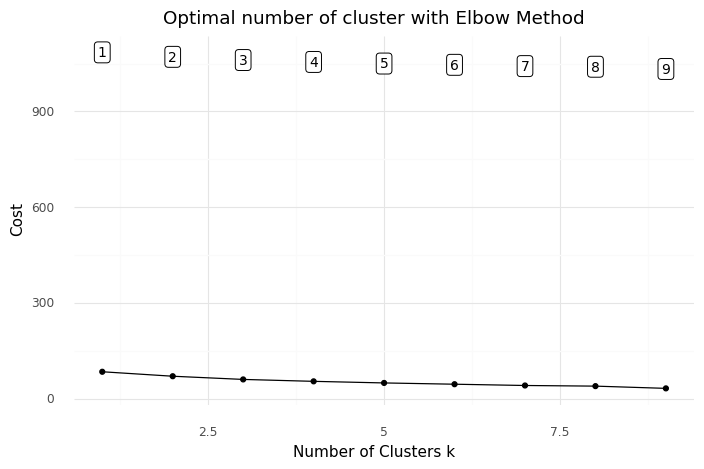

<ggplot: (8782386966935)>

In [155]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Fit the data

In [156]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

array([2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1],
      dtype=uint16)

In [157]:
# Cluster centorid
kmodes.cluster_centroids_

array([['Female', 'Kerala', 'Baby Products', 'Others',
        '1 or Less than 1', 'Less than 1000', '3 - 5 Days',
        'Discount On Price'],
       ['Male', 'Andhra Pradesh', 'Electronics', 'Samsung',
        '1 or Less than 1', '1000 - 5000', '2 - 3 Days',
        'Discount On Price'],
       ['Male', 'Bihar', 'Fashion', 'Others', '2 -5', '1000 - 5000',
        '1 Day', 'Discount On Price']], dtype='<U17')

In [158]:
# Check the iteration of the clusters created
kmodes.n_iter_

1

In [159]:
# Check the cost of the clusters created
kmodes.cost_

61.0

### Add the cluster to the dataframe

In [163]:
# Add the cluster to the dataframe
df_cat['Cluster Labels'] = kmodes.labels_
df_cat['Segment'] = df_cat['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

/tmp/ipykernel_16078/3512418192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16078/3512418192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [164]:
# Order the cluster
df_cat['Segment'] = df_cat['Segment'].astype('category')
df_cat['Segment'] = df_cat['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

/tmp/ipykernel_16078/3231684393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16078/3231684393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [165]:
df_cat.head()

,gender,location,product_type,brand,monthly_shopping,monthly_max,delivery_days,type_of_offer,Cluster Labels,Segment
0,Male,Bihar,Fashion,Others,2 -5,1000 - 5000,2 - 3 Days,Discount On Price,2,Third
1,Male,West Bengal,Electronics,Sony,2 -5,1000 - 5000,2 - 3 Days,Discount On Price,1,Second
2,Male,Jharkhand,Electronics,Samsung,1 or Less than 1,More than 10000,2 - 3 Days,Product Purchase on Installement,1,Second
3,Male,Andhra Pradesh,Electronics,Sony,1 or Less than 1,1000 - 5000,2 - 3 Days,Discount On Price,1,Second
4,Male,Bihar,Electronics,Samsung,2 -5,1000 - 5000,3 - 5 Days,Discount On Price,1,Second


In [166]:
df_cat.columns

Index(['gender', 'location', 'product_type', 'brand', 'monthly_shopping',
       'monthly_max', 'delivery_days', 'type_of_offer', 'Cluster Labels',
       'Segment'],
      dtype='object')

In [168]:
# Columns for centroids
list_col = ['name', 'Cluster Labels', 'Segment']
cols = [col for col in df_cat if col not in list_col]
cols

['gender',
 'location',
 'product_type',
 'brand',
 'monthly_shopping',
 'monthly_max',
 'delivery_days',
 'type_of_offer']

In [170]:
index = ['First Cluster', 'Second Cluster', 'Third Cluster']

In [171]:
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,gender,location,product_type,brand,monthly_shopping,monthly_max,delivery_days,type_of_offer
First Cluster,Female,Kerala,Baby Products,Others,1 or Less than 1,Less than 1000,3 - 5 Days,Discount On Price
Second Cluster,Male,Andhra Pradesh,Electronics,Samsung,1 or Less than 1,1000 - 5000,2 - 3 Days,Discount On Price
Third Cluster,Male,Bihar,Fashion,Others,2 -5,1000 - 5000,1 Day,Discount On Price
